In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\ExcelR\Assignments\A_15_Random_forest

16-07-2022  16:07    <DIR>          .
16-07-2022  16:07    <DIR>          ..
16-07-2022  15:08    <DIR>          .ipynb_checkpoints
16-07-2022  16:07           200,482 assignment15_random_forest.ipynb
14-07-2022  08:43            17,023 Company_Data.csv
14-07-2022  08:43            21,837 Fraud_check.csv
14-07-2022  08:43             1,377 problem statement(company data).txt
14-07-2022  08:43               460 Problem_statement(Fraudcheck).txt
               5 File(s)        241,179 bytes
               3 Dir(s)  119,559,217,152 bytes free


# Q1. Fraud Check

Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not (YES and NO)

Marital.Status : marital status of a person (Single, Married, Divorced)

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government (Numerical)

Work Experience : Work experience of an individual person (Numerical--> years)

Urban : Whether that person belongs to urban area or not (Yes and NO)

City Population : Count of people living in the city

In [170]:
data_1=pd.read_csv("Fraud_check.csv")

In [171]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [172]:
data_1.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [173]:
data_1.shape

(600, 6)

In [174]:
data_1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<AxesSubplot:xlabel='Taxable.Income'>

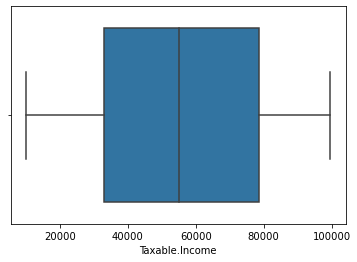

In [175]:
# Outliers check
sns.boxplot(data_1['Taxable.Income'])

The data has no outliers.

In [176]:
# One hot encoding/ creating dummies
data_1=pd.get_dummies(data_1)

In [177]:
data_1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In this data the Target variable--> Taxable income is a continuos data, we have to convert it into categorical based on the given condition.

If Taxable Income<= 30000 label it as "Risky", otherwise label it as "Good"

In [178]:
data_1['Taxable.Income']=np.where(data_1['Taxable.Income']<=30000,'Risky','Good')

In [179]:
data_1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


In [180]:
corr=data_1.corr()
corr

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
City.Population,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098
Work.Experience,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559
Undergrad_NO,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267
Undergrad_YES,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267
Marital.Status_Divorced,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518
Marital.Status_Married,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771
Marital.Status_Single,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014
Urban_NO,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000
Urban_YES,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000


<AxesSubplot:>

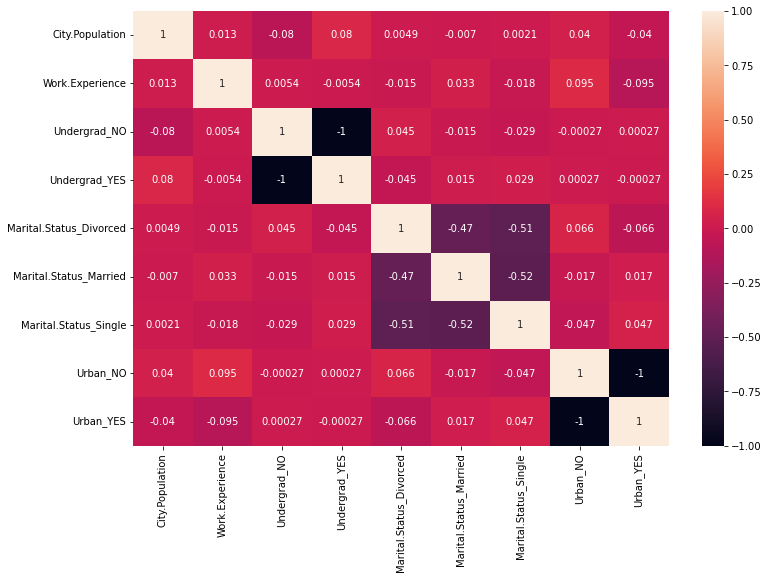

In [181]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

The features are having very low correlation

In [182]:
# Splitting the features and target variable

x=data_1.iloc[:,1:]
y=data_1.iloc[:,0]

In [183]:
# Splitting the data into training and testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [184]:
x_train.shape

(420, 9)

In [185]:
x_test.shape

(180, 9)

In [186]:
# Model creation

RF=RandomForestClassifier(n_estimators=20,min_samples_split=2,max_features='auto',max_samples=0.8,random_state=8)
RF.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.8, n_estimators=20, random_state=8)

In [187]:
# Testing the model on training data

y_train_pred=RF.predict(x_train)
accuracy_score(y_train,y_train_pred)

0.9547619047619048

In [188]:
confusion_matrix(y_train,y_train_pred)

array([[330,   0],
       [ 19,  71]], dtype=int64)

In [189]:
# Testing the model on test data

y_test_pred=RF.predict(x_test)
accuracy_score(y_test,y_test_pred)

0.7555555555555555

In [190]:
confusion_matrix(y_test,y_test_pred)

array([[134,  12],
       [ 32,   2]], dtype=int64)

In [191]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
result

,Actual,Predicted
195,Good,Good
155,Good,Good
40,Good,Good
212,Good,Good
52,Good,Good
...,...,...
568,Good,Good
358,Good,Good
456,Good,Good
577,Good,Good


# The Accuracy on test data is 75.55%

# Tree Plot

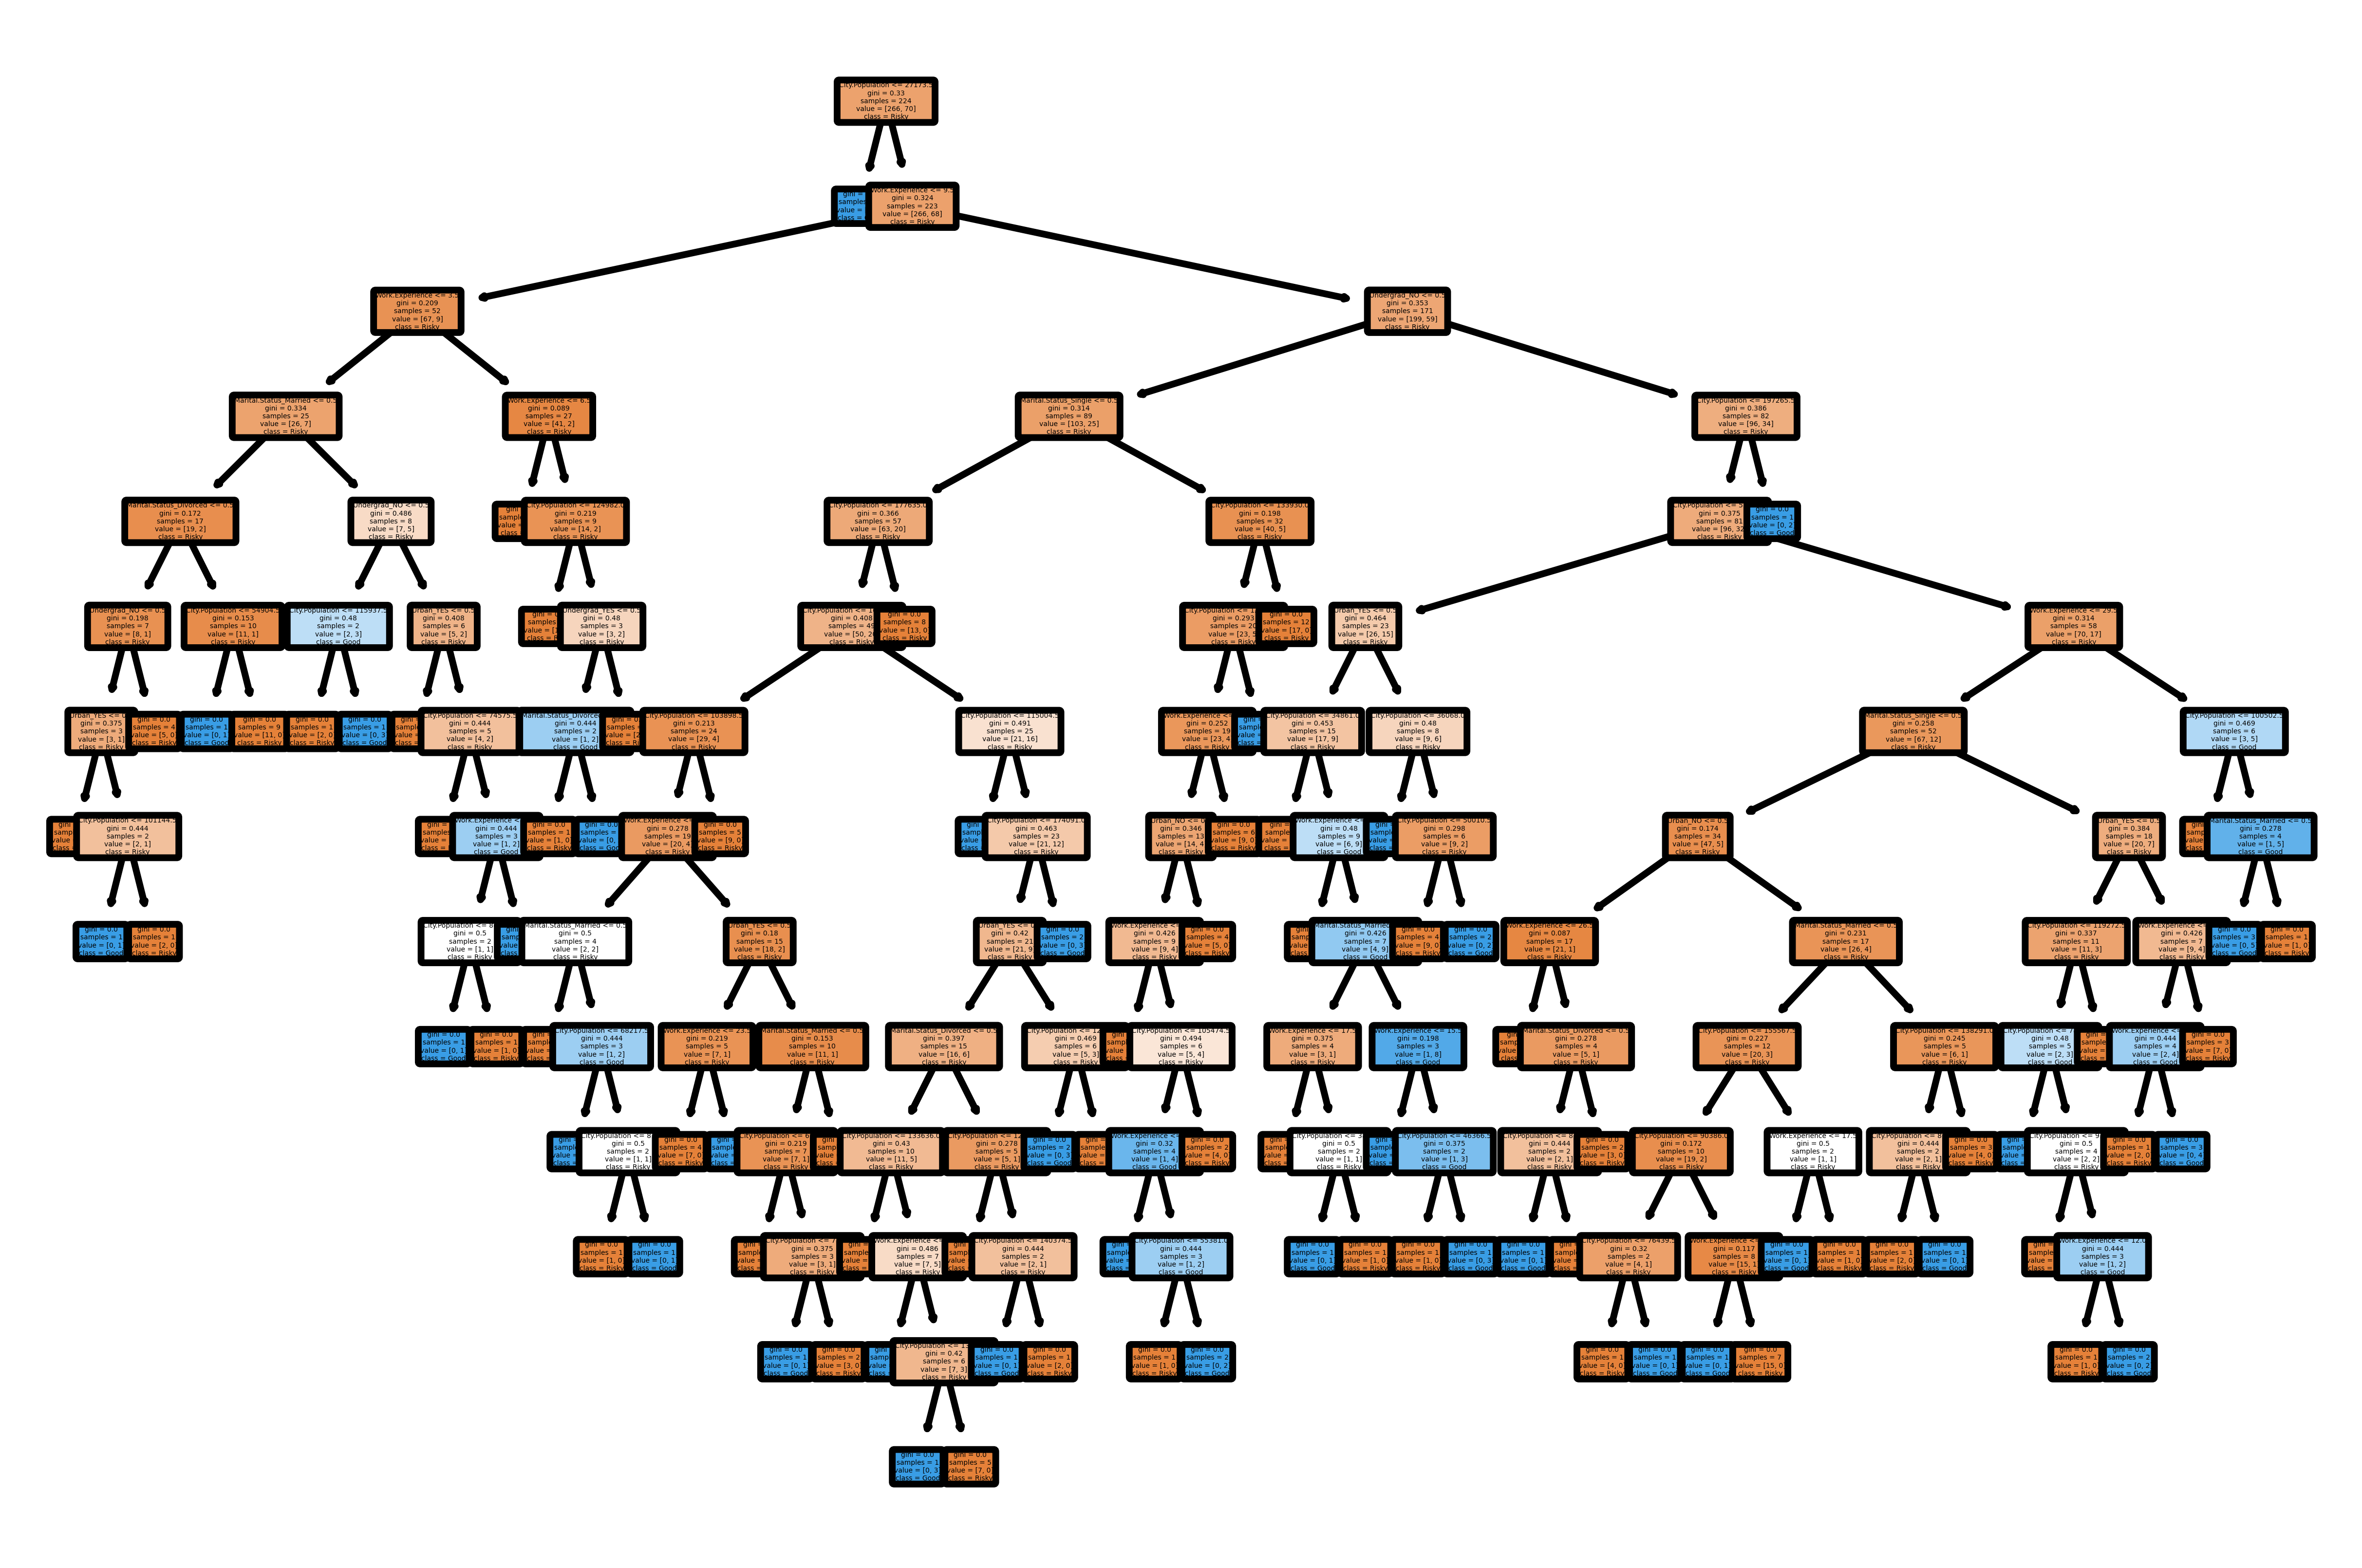

In [194]:
fn=list(x_train.columns)
cn=['Risky','Good']
plt.figure(dpi=1000)
# We can plot the tree individually
tree.plot_tree(RF.estimators_[0],feature_names=fn,class_names=cn,filled=True,rounded=True);

In [192]:
# Feature Importance
RF.feature_importances_

array([0.51496687, 0.32836055, 0.02325268, 0.01863683, 0.02067398,
       0.02117614, 0.02454961, 0.024577  , 0.02380635])

In [193]:
fi=pd.DataFrame({'Features':list(x_train.columns),'Importance':RF.feature_importances_})
fi.sort_values('Importance',ascending=False)

,Features,Importance
0,City.Population,0.514967
1,Work.Experience,0.328361
7,Urban_NO,0.024577
6,Marital.Status_Single,0.024550
8,Urban_YES,0.023806
2,Undergrad_NO,0.023253
5,Marital.Status_Married,0.021176
4,Marital.Status_Divorced,0.020674
3,Undergrad_YES,0.018637


The City Population feature has the highest importance

# Q2. Company data

A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

The attributes are as follows:

1. Sales -- Unit sales (in thousands) at each location

2. Competitor Price -- Price charged by competitor at each location

3. Income -- Community income level (in thousands of dollars)

4. Advertising -- Local advertising budget for company at each location (in thousands of dollars)

5. Population -- Population size in region (in thousands)

6. Price -- Price company charges for car seats at each site

7. Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site.

8. Age -- Average age of the local population

9. Education -- Education level at each location

10. Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

11. US -- A factor with levels No and Yes to indicate whether the store is in the US or not

In [144]:
data_2=pd.read_csv("Company_Data.csv")

In [145]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [146]:
data_2.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [147]:
data_2.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [148]:
data_2.shape

(400, 11)

In [149]:
# Correlation table
correlation=data_2.corr()
correlation

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

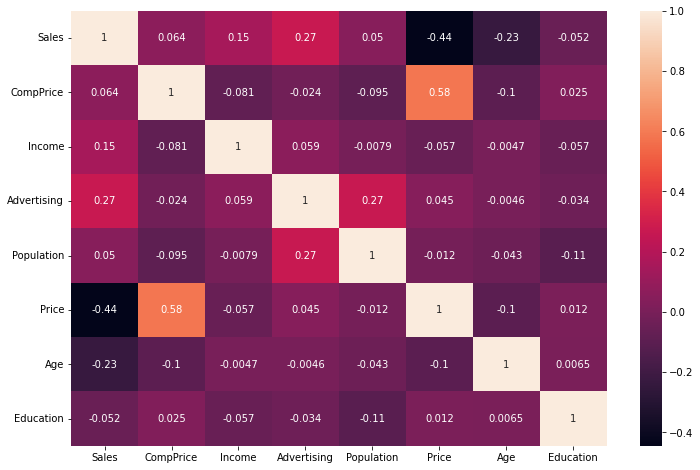

In [150]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True)

As we can see from the heatmap, the features have very less relationship between them.

<AxesSubplot:xlabel='Sales'>

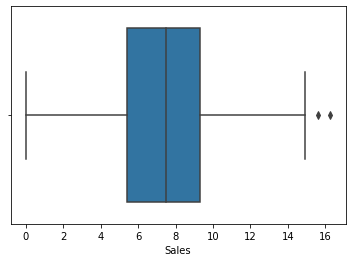

In [151]:
# Checking for outliers
sns.boxplot(data_2['Sales'])

There are 2 outliers present

In [152]:
data_2=pd.get_dummies(data_2)

In [153]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   ShelveLoc_Bad     400 non-null    uint8  
 9   ShelveLoc_Good    400 non-null    uint8  
 10  ShelveLoc_Medium  400 non-null    uint8  
 11  Urban_No          400 non-null    uint8  
 12  Urban_Yes         400 non-null    uint8  
 13  US_No             400 non-null    uint8  
 14  US_Yes            400 non-null    uint8  
dtypes: float64(1), int64(7), uint8(7)
memory usage: 27.9 KB


# Converting the target variable from continuos to categorical data based on the "Median"

# If Sales <= 7.49 --> 'Low' Sales value, If Sales > 7.49--> 'High' Sales value

In [154]:
data_2

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [155]:
data_2['Sales']=np.where(data_2['Sales']<=7.49,'Low','High')

In [156]:
data_2

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,High,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,High,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,High,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,Low,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,Low,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,Low,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,Low,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,Low,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [157]:
# Splitting features and target variable

X=data_2.iloc[:,1:]
Y=data_2.iloc[:,0]

In [158]:
# Splitting the data into training and testing

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1234)

In [159]:
X_train.shape

(280, 14)

In [160]:
X_test.shape

(120, 14)

In [161]:
# Model creation
model=RandomForestClassifier(n_estimators=20,max_samples=0.8,min_samples_split=5,random_state=8)
model.fit(X_train,Y_train)

RandomForestClassifier(max_samples=0.8, min_samples_split=5, n_estimators=20,
                       random_state=8)

In [162]:
# Testing model on training data
Y_train_pred=model.predict(X_train)
accuracy_score(Y_train,Y_train_pred)

0.975

In [163]:
confusion_matrix(Y_train,Y_train_pred)

array([[140,   5],
       [  2, 133]], dtype=int64)

In [164]:
# Testing the model on test data
Y_test_pred=model.predict(X_test)
accuracy_score(Y_test,Y_test_pred)

0.8083333333333333

In [165]:
confusion_matrix(Y_test,Y_test_pred)

array([[42, 12],
       [11, 55]], dtype=int64)

In [166]:
Result=pd.DataFrame({'Actual_Y':Y_test,'Predicted_Y':Y_test_pred})
Result

,Actual_Y,Predicted_Y
44,Low,Low
110,High,High
78,Low,Low
181,Low,High
285,High,High
...,...,...
193,High,High
312,Low,Low
225,Low,Low
366,Low,High


# The Accuracy on the test data is 80.833%

# Tree Plot

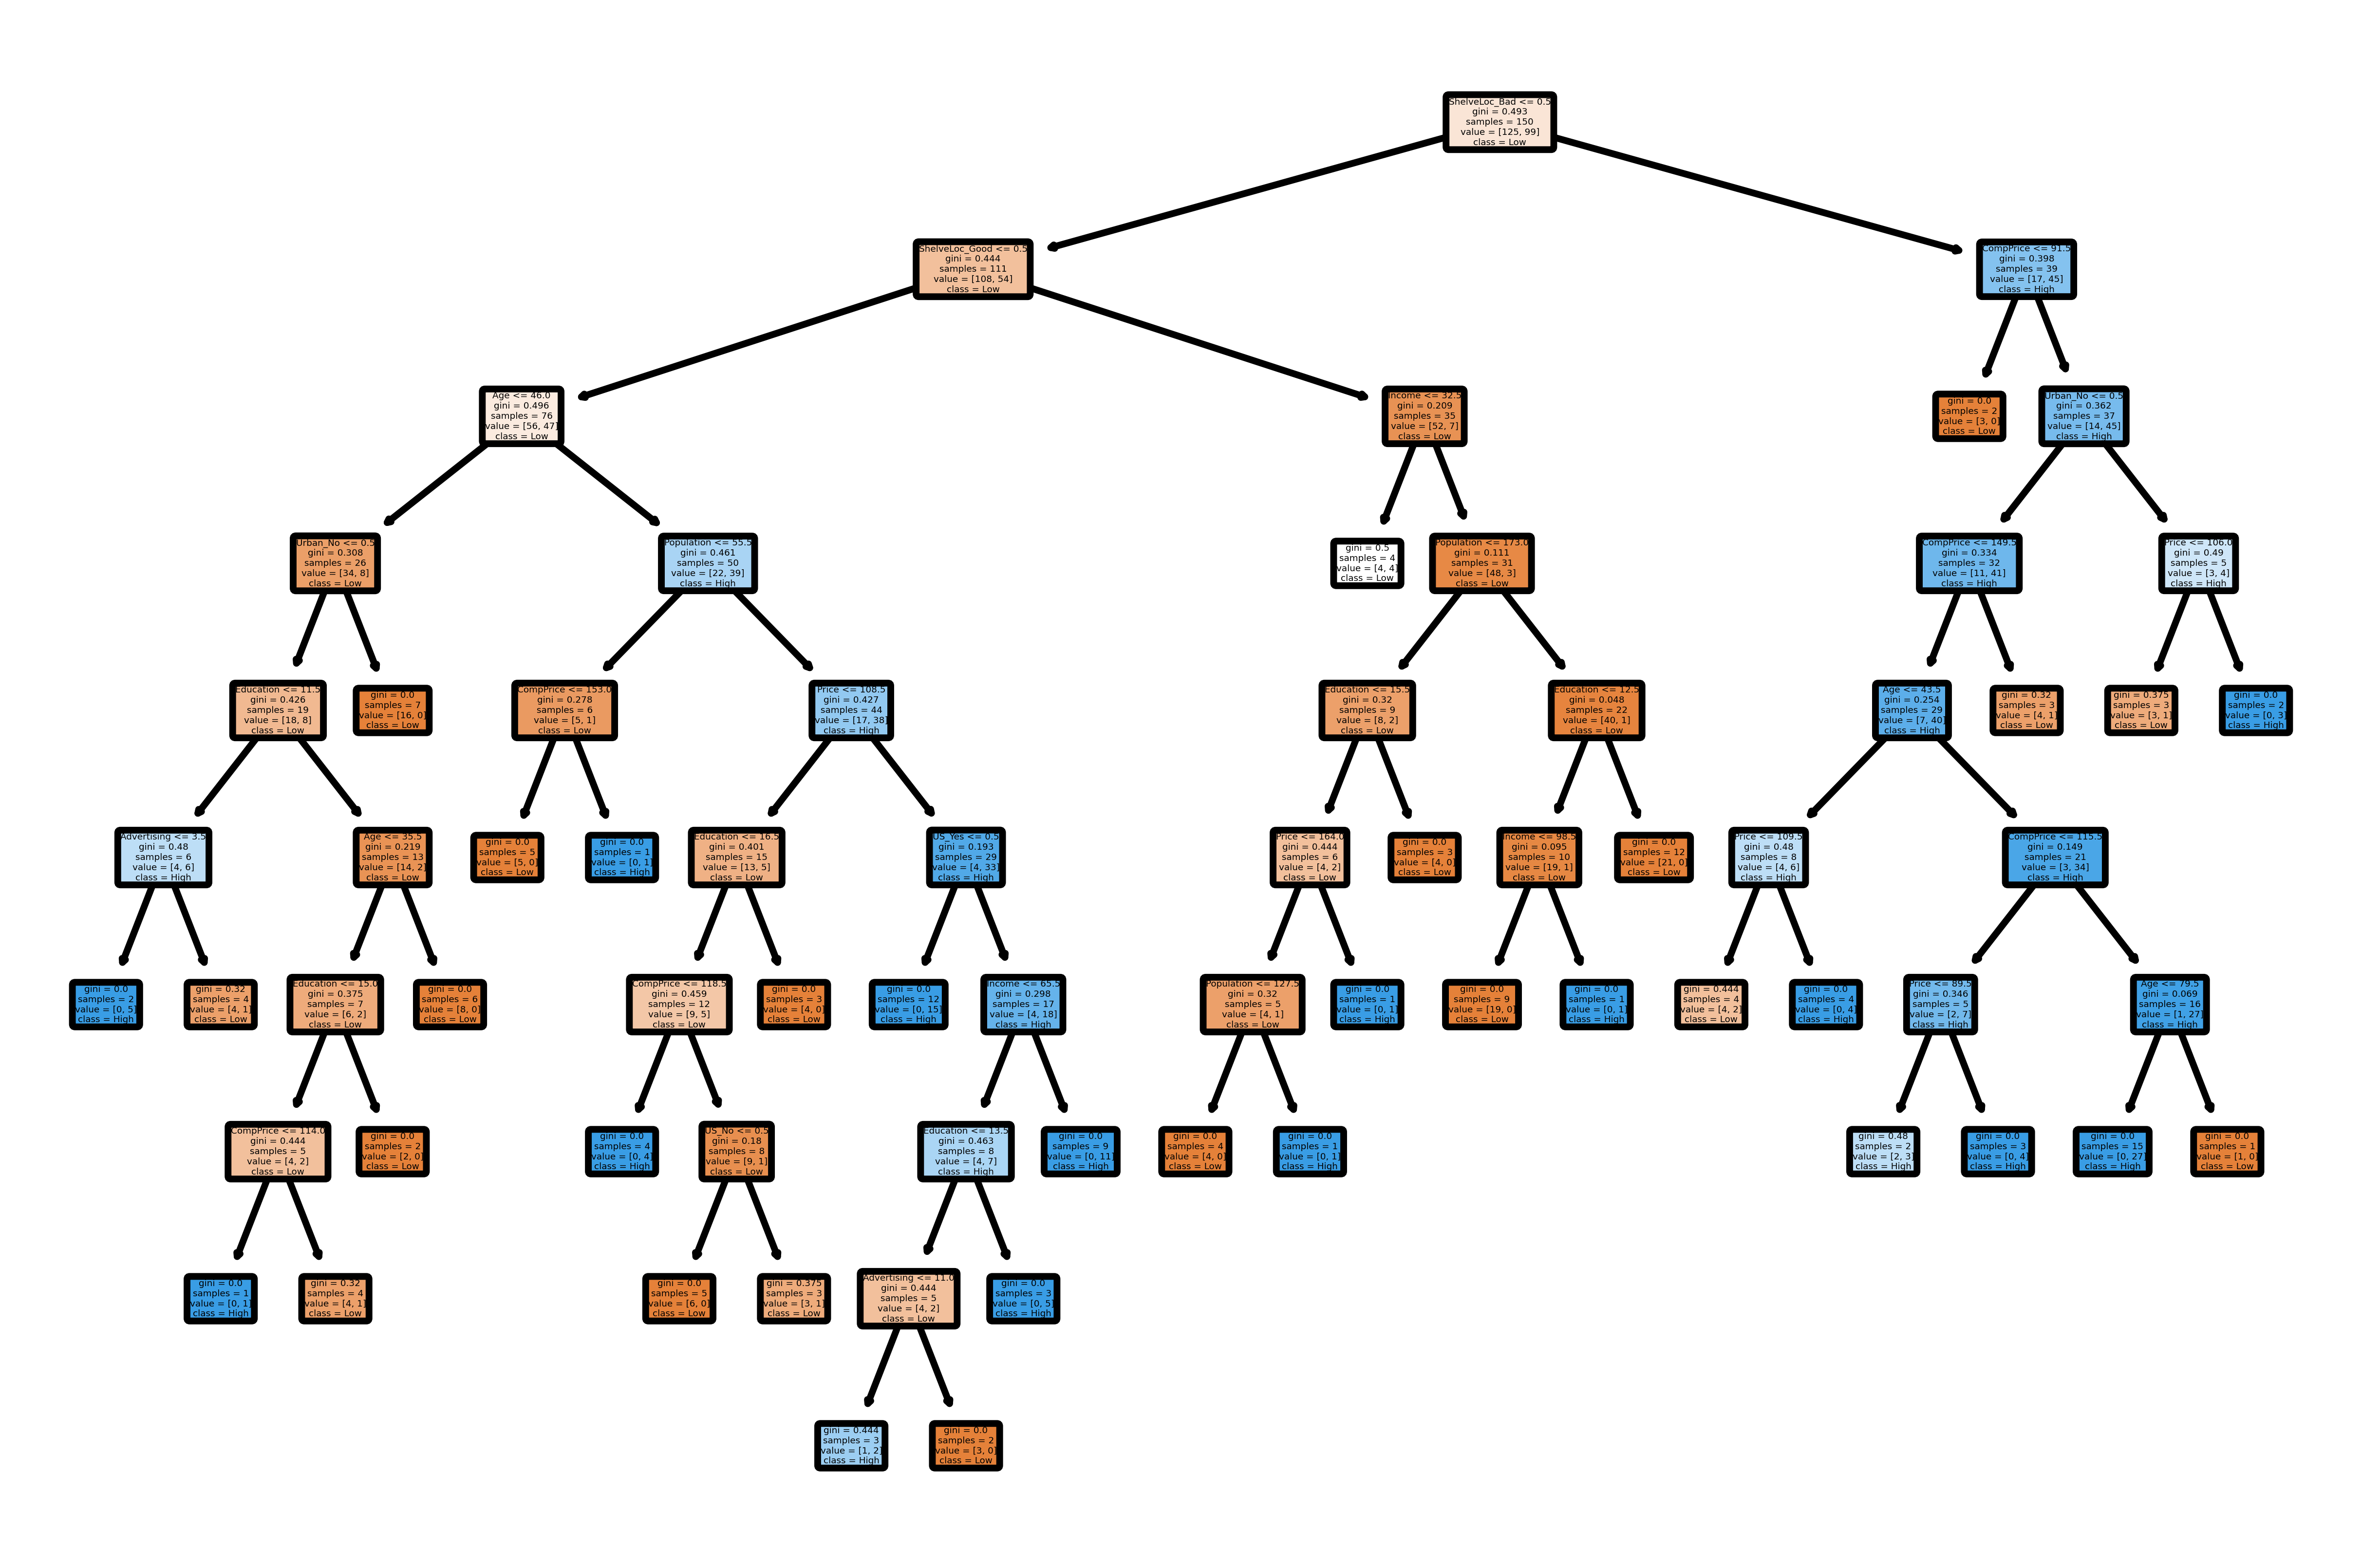

In [167]:
f_n=list(X_train.columns)
c_n=['Low','High']
plt.figure(dpi=1000)
# We can plot the tree individually
tree.plot_tree(model.estimators_[0],feature_names=f_n,class_names=c_n,filled=True,rounded=True);

In [168]:
# Feature Importance
model.feature_importances_

array([0.12191775, 0.07467659, 0.09707307, 0.07718422, 0.21443668,
       0.1363103 , 0.05642216, 0.08115043, 0.08507848, 0.01986234,
       0.0070928 , 0.01021978, 0.00438595, 0.01418946])

In [169]:
FI=pd.DataFrame({'Features':list(X_train.columns),'Importance':model.feature_importances_})
FI.sort_values('Importance',ascending=False)

,Features,Importance
4,Price,0.214437
5,Age,0.136310
0,CompPrice,0.121918
2,Advertising,0.097073
8,ShelveLoc_Good,0.085078
7,ShelveLoc_Bad,0.081150
3,Population,0.077184
1,Income,0.074677
6,Education,0.056422
9,ShelveLoc_Medium,0.019862


As we can see the "Price" feature has highest importance.